In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

# PhD course
## Volumetric Modelling


Digital Building Technologies DBT<br>
[dbt.arch.ethz.ch](http://dbt.arch.ethz.ch)

Mathias Bernhard<br>
[bernhard@arch.ethz.ch](mailto:bernhard@arch.ethz.ch)

# Boundary Representation

list of vertices for a rectangle with sides `a` and `b`
<pre>
v -a/2 -b/2 
v  a/2 -b/2
v  a/2  b/2
v -a/2  b/2
</pre>

list of lines / edges connecting the vertices
<pre>
l 0 l
l 1 2
l 2 3
l 3 0
</pre>

rectangular face created from the 4 points
<pre>f 0 1 2 3</pre>

(-4.0, 4.0, -4.0, 4.0)

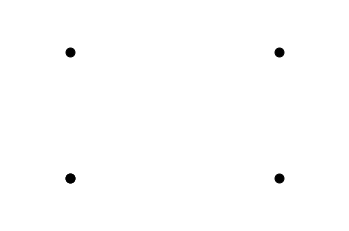

In [4]:
a, b = 5., 3.
v = [[-a/2,-b/2], [a/2,-b/2], [a/2,b/2], [-a/2,b/2], [-a/2,-b/2]]
vx = [c[0] for c in v]
vy = [c[1] for c in v]
plt.scatter(vx,vy, s=80, c='k')
plt.axis('equal')
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.axis('off')

(-4.0, 4.0, -4.0, 4.0)

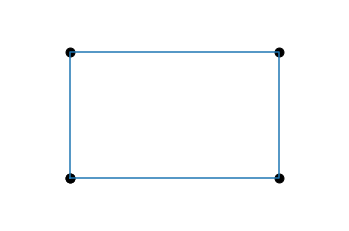

In [5]:
plt.scatter(vx,vy, s=80, c='k')
plt.plot(vx,vy)
plt.axis('equal')
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.axis('off')

# Function Representation

<pre>f(x,y) = max(abs(x) - a/2, abs(y) - b/2)</pre>

## sample space at discrete intervals

In [6]:
mr = np.empty((42,42))
for x in range(42):
    for y in range(42):
        cx = -4 + (x/42.)*8
        cy = -4 + (y/42.)*8
        d = max(abs(cx) - a/2, abs(cy) - b/2)
        mr[y,x] = d

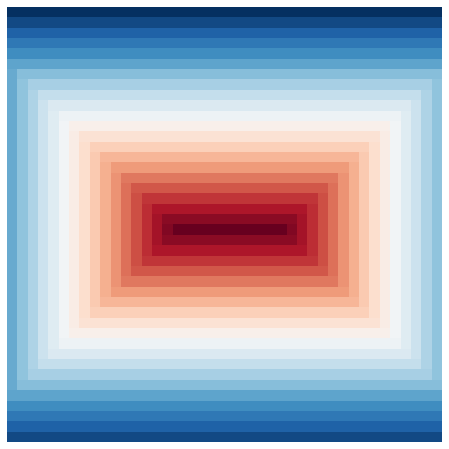

In [8]:
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(mr, cmap='RdBu')

## boundary is where f(x,y)=0

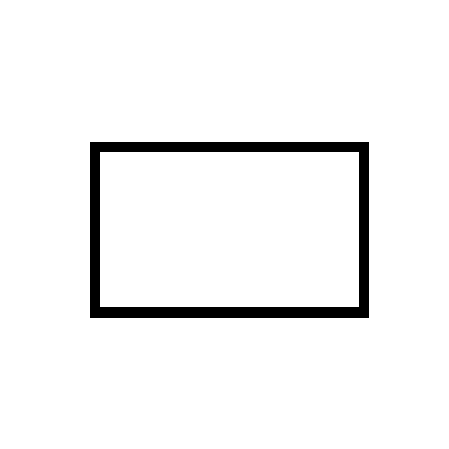

In [9]:
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(abs(mr)<0.1,cmap='Greys')

## More Primitives: box, sphere, torus, cylinder, cone, ...
### Circle:
<pre>f(x,y) = sqrt(x**2 + y**2) - r</pre>

In [10]:
mc = np.empty((42,42))
for x in range(42):
    for y in range(42):
        cx = -4 + (x/42.)*8
        cy = -4 + (y/42.)*8
        d = math.sqrt(cx**2 + cy**2) - 2.2
        mc[y,x] = d

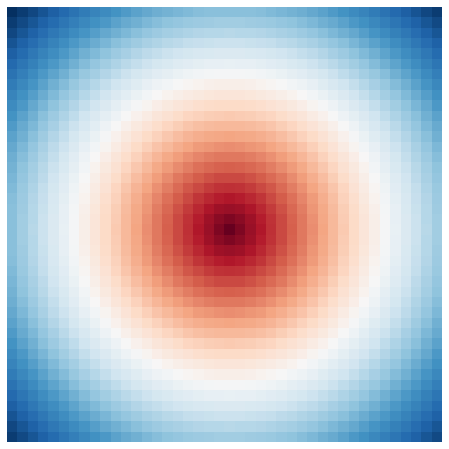

In [11]:
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(mc, cmap='RdBu')

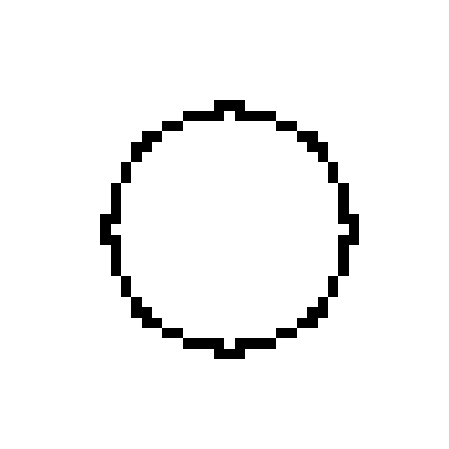

In [10]:
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(abs(mc)<0.1,cmap='Greys')

## OOP: Primitive Classes

In [77]:
class Rectangle(object):
    def __init__(self, px, py, w, h):
        self.px = px
        self.py = py
        self.w  = w
        self.h  = h
    
    def get_distance(self, x, y):
        max(abs(x-self.px) - self.w/2, abs(y-self.py) - self.h/2)

In [ ]:
class Circle(object):
    def __init__(self, px, py, r):
        self.px = px
        self.py = py
        self.r  = r

## Boolean operations

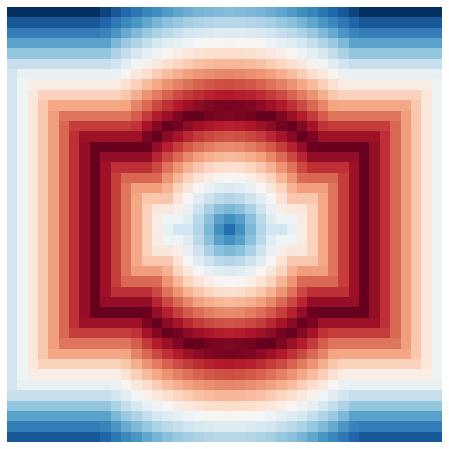

In [11]:
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(abs(np.minimum(mr,mc)),cmap='RdBu')

### Union
min(A, B)

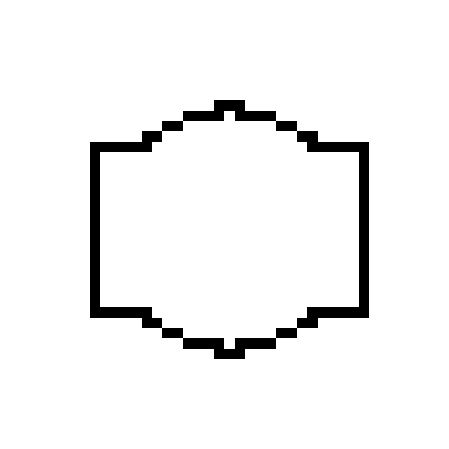

In [17]:
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(abs(np.minimum(mr,mc))<0.1,cmap='Greys')

### Intersection
max(A, B)

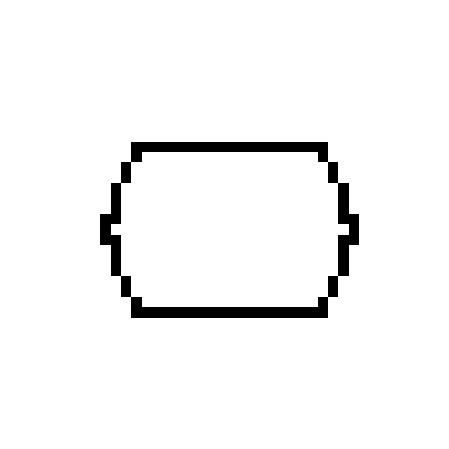

In [13]:
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(abs(np.maximum(mr,mc))<0.1,cmap='Greys')

### Subtraction
max(A, -B)

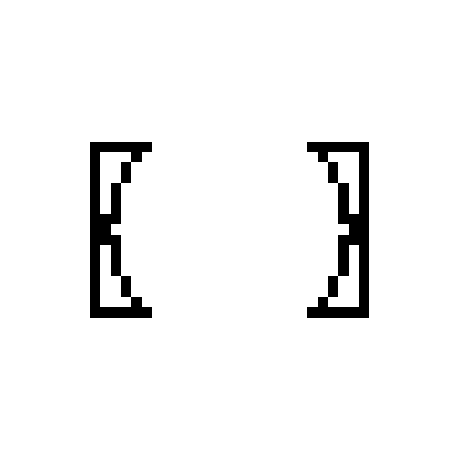

In [14]:
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(abs(np.maximum(mr,-mc))<0.1,cmap='Greys')

### Subtraction
max(-A, B)

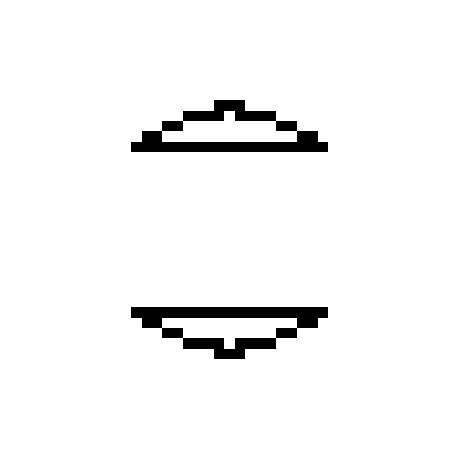

In [15]:
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(abs(np.maximum(-mr,mc))<0.1,cmap='Greys')

### Iso-Contour

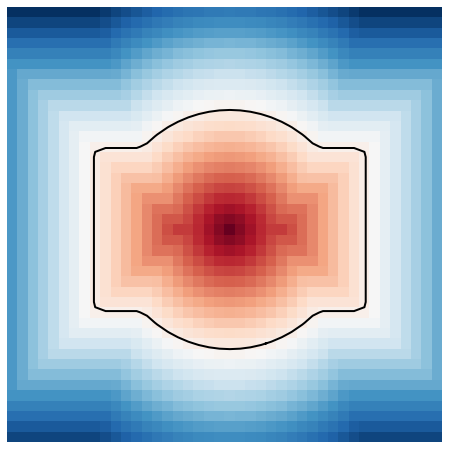

In [12]:
from skimage import measure
contours = measure.find_contours(np.minimum(mr,mc), 0.)
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(np.minimum(mr,mc),cmap='RdBu')
for n, contour in enumerate(contours):
    plt.plot(contour[:, 1], contour[:, 0], linewidth=2, c='k')

In [21]:
%whos

Variable   Type       Data/Info
-------------------------------
a          float      5.0
b          float      3.0
contour    ndarray    101x2: 202 elems, type `float64`, 1616 bytes
contours   list       n=1
cx         float      3.8095238095238093
cy         float      3.8095238095238093
d          float      3.1874802376117906
math       module     <module 'math' from '/ana<...>h.cpython-37m-darwin.so'>
mc         ndarray    42x42: 1764 elems, type `float64`, 14112 bytes
measure    module     <module 'skimage.measure'<...>age/measure/__init__.py'>
mr         ndarray    42x42: 1764 elems, type `float64`, 14112 bytes
n          int        0
np         module     <module 'numpy' from '/an<...>kages/numpy/__init__.py'>
plt        module     <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
v          list       n=5
vx         list       n=5
vy         list       n=5
x          int        41
y          int        41


In [22]:
%env

{'TERM_PROGRAM': 'Apple_Terminal',
 'SHELL': '/bin/bash',
 'TERM': 'xterm-color',
 'TMPDIR': '/var/folders/sv/q8l35phx5wd007nk3md42mrr0000gn/T/',
 'CONDA_SHLVL': '2',
 'Apple_PubSub_Socket_Render': '/private/tmp/com.apple.launchd.IPaLJzWOa2/Render',
 'CONDA_PROMPT_MODIFIER': '(sandbox) ',
 'TERM_PROGRAM_VERSION': '421.2',
 'OLDPWD': '/Users/bernham/Documents/Resources/ProgrammingLibraries/compas-dev',
 'TERM_SESSION_ID': '58B4EBDE-FE25-4616-A83D-160DFC930F2F',
 'USER': 'bernham',
 'CONDA_EXE': '/anaconda3/bin/conda',
 'SSH_AUTH_SOCK': '/private/tmp/com.apple.launchd.W95W5yDsiw/Listeners',
 '_CE_CONDA': '',
 'CONDA_PREFIX_1': '/anaconda3',
 'PATH': '/anaconda3/envs/sandbox/bin:/Applications/blender.app/Contents/MacOS:/anaconda3/envs/sandbox/bin:/anaconda3/condabin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/usr/local/share/dotnet:~/.dotnet/tools:/Library/Frameworks/Mono.framework/Versions/Current/Commands:/Applications/Xamarin Workbooks.app/Contents/SharedSupport/path-bin',
 'CONDA_PR